In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Dataset .csv")
data = pd.DataFrame(dataset)
data = data.dropna()
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [3]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
data['Cuisines'].str.split(',')

0              [French,  Japanese,  Desserts]
1                                  [Japanese]
2       [Seafood,  Asian,  Filipino,  Indian]
3                          [Japanese,  Sushi]
4                         [Japanese,  Korean]
                        ...                  
9546                                [Turkish]
9547      [World Cuisine,  Patisserie,  Cafe]
9548                [Italian,  World Cuisine]
9549                        [Restaurant Cafe]
9550                                   [Cafe]
Name: Cuisines, Length: 9542, dtype: object

LEVEL 1 
Task1: Top Cuisines

Determine the top three most
common cuisines in the dataset.

In [5]:
top3cuisines = data['Cuisines'].value_counts().head(3).to_dict()
print(top3cuisines)                                                                  

{'North Indian': 936, 'North Indian, Chinese': 511, 'Chinese': 354}


Calculate the percentage of
restaurants that serve each of the top
cuisines.

In [6]:
# for cuisine in top3cuisines:
#     print(cuisine)

In [7]:
# count = data['Cuisines'].apply(lambda x: cuisine in x)
# print (data[count])

In [8]:
# count.sum()

In [9]:
cuisine_rest_count ={cuisine: int(data['Cuisines'].apply(lambda x: cuisine in x).sum()) for cuisine in top3cuisines}  #Stores the cuisine & count in a dictionary
cuisine_rest_count

{'North Indian': 3960, 'North Indian, Chinese': 1060, 'Chinese': 2733}

In [10]:
print(cuisine_rest_count.keys())
print(cuisine_rest_count.values())

dict_keys(['North Indian', 'North Indian, Chinese', 'Chinese'])
dict_values([3960, 1060, 2733])


In [11]:
total_rest = len(data)
total_rest

9542

In [12]:
percentage = {}
for cuisine, count in cuisine_rest_count.items():
    percentage[cuisine] = (float(count) / total_rest)* 100
result = (list(percentage.items()))
result

[('North Indian', 41.50073359882624),
 ('North Indian, Chinese', 11.108782225948438),
 ('Chinese', 28.641794173129327)]

In [13]:
percent_data = pd.DataFrame((result), columns=['cuisines', 'percentage']).round(2)
percent_data 

,cuisines,percentage
0,North Indian,41.50
1,"North Indian, Chinese",11.11
2,Chinese,28.64


TASK 2: City Analysis

Identify the city with the highest number of restaurants in the dataset.

In [14]:
top_city = data['City'].value_counts().to_dict()
print(list(top_city.items()))

[('New Delhi', 5473), ('Gurgaon', 1118), ('Noida', 1080), ('Faridabad', 251), ('Ghaziabad', 25), ('Bhubaneshwar', 21), ('Ahmedabad', 21), ('Lucknow', 21), ('Guwahati', 21), ('Amritsar', 21), ('S��o Paulo', 20), ('Bras�_lia', 20), ('Doha', 20), ('Cape Town', 20), ('Wellington City', 20), ('Auckland', 20), ('Mumbai', 20), ('Mangalore', 20), ('Ludhiana', 20), ('Nashik', 20), ('Jaipur', 20), ('Rio de Janeiro', 20), ('Augusta', 20), ('Athens', 20), ('Dalton', 20), ('Davenport', 20), ('Boise', 20), ('Cedar Rapids/Iowa City', 20), ('Singapore', 20), ('Waterloo', 20), ('Birmingham', 20), ('Edinburgh', 20), ('London', 20), ('Manchester', 20), ('Des Moines', 20), ('Columbus', 20), ('Dubuque', 20), ('Sioux City', 20), ('Tampa Bay', 20), ('Valdosta', 20), ('Dubai', 20), ('Abu Dhabi', 20), ('Pensacola', 20), ('Pocatello', 20), ('Sharjah', 20), ('Agra', 20), ('Patna', 20), ('Mysore', 20), ('Bangalore', 20), ('Bhopal', 20), ('Vizag', 20), ('Varanasi', 20), ('Surat', 20), ('Kolkata', 20), ('Kanpur', 2

In [15]:
top_city = data['City'].value_counts()                                      # print (f"{top_city.index[0]}: {int(top_city.iloc[0])}")

# for key, value in top_city.items():
#     print (f"The city \"{key}\" have highest number of restaurants values is : {value}")

# print(top_city.idxmax())
# print(top_city.max())
print (f"The city \"{top_city.idxmax()}\" have highest number of restaurants values is : {top_city.max()}")

The city "New Delhi" have highest number of restaurants values is : 5473


In [16]:
data[data['City'] == 'New Delhi'].value_counts()

Restaurant ID  Restaurant Name                Country Code  City       Address                                                          Locality                Locality Verbose                   Longitude  Latitude   Cuisines                             Average Cost for two  Currency            Has Table booking  Has Online delivery  Is delivering now  Switch to order menu  Price range  Aggregate rating  Rating color  Rating text  Votes
18500618       Veg. Darbar                    1             New Delhi  Near Metro Pillar 682, Uttam Nagar West, Uttam Nagar, New Delhi  Uttam Nagar             Uttam Nagar, New Delhi             77.057052  28.621884  North Indian, Chinese                400                   Indian Rupees(Rs.)  No                 No                   No                 No                    1            0.0               White         Not rated    1        1
18492083       The Artful Baker               1             New Delhi  D Block Market. Near HDFC, Vasant Vihar, N

Calculate the average rating for
restaurants in each city.

In [17]:
avg_city = data.groupby('City')['Aggregate rating'].mean().round(2)              # data.groupby('column_name').aggregation_function()
avg_city

City
Abu Dhabi          4.30
Agra               3.96
Ahmedabad          4.16
Albany             3.55
Allahabad          3.40
                   ... 
Weirton            3.90
Wellington City    4.25
Winchester Bay     3.20
Yorkton            3.30
��stanbul          4.29
Name: Aggregate rating, Length: 140, dtype: float64

Determine the city with the highest
average rating.

In [18]:
#type(max(avg_city.items(), key=lambda x: x[1]))                         x[1] because in this type is tuple and the only two items are present
high_avg_rate = (max(avg_city.items(), key=lambda x: x[1]))
print(f"{high_avg_rate[0]} : {high_avg_rate[1]}")

Inner City : 4.9


In [19]:
data[data['City'] == 'Inner City' ]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9457,6501534,Cube - Tasting Kitchen,189,Inner City,"24 Albrecht Road, Maboneng Precinct, City and ...",City and Suburban,"City and Suburban, Inner City",28.060192,-26.203278,"European, Contemporary",...,Rand(R),No,No,No,No,4,4.9,Dark Green,Excellent,441
9458,18339373,Urbanologi,189,Inner City,"1 Fox Street, Marshalltown, Inner City, Johann...",Marshalltown,"Marshalltown, Inner City",28.031863,-26.207091,Tapas,...,Rand(R),No,No,No,No,4,4.9,Dark Green,Excellent,194


Task 3: Price Range Distribution

Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

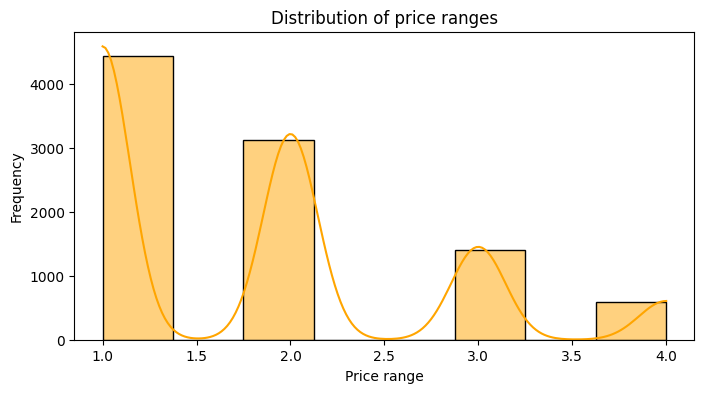

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Price range'],kde=True, bins=8, color="orange")          #Kernel Density Estimate (KDE) kde=True,
plt.xlabel("Price range")
plt.ylabel("Frequency")
plt.title("Distribution of price ranges") 
plt.show()

Calculate the percentage of restaurants
in each price range category.

In [23]:
price_count = data['Price range'].value_counts()
print(price_count)
print(total_rest)

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64
9542


In [24]:
price_percent = ((price_count / total_rest) * 100).round(2)
price_percent = list(price_percent.items())
price_percent

[(1, 46.51), (2, 32.62), (3, 14.72), (4, 6.14)]

In [25]:
percent_rest_price = pd.DataFrame((price_percent), columns=['price range', 'percentage'])
percent_rest_price

,price range,percentage
0,1,46.51
1,2,32.62
2,3,14.72
3,4,6.14


Task 4: Online Delivery

Determine the percentage of restaurants
that offer online delivery.

In [26]:
online_count = data['Has Online delivery'].value_counts()
online_count

Has Online delivery
No     7091
Yes    2451
Name: count, dtype: int64

In [27]:
data[data['Has Online delivery'] ==  'Yes'].head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
565,5704255,Famous Dave's Barbecue,214,Abu Dhabi,"Near The One, Level 3, Abu Dhabi Mall, Tourist...","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah...",54.382946,24.495693,American,...,Emirati Diram(AED),No,Yes,No,No,4,4.6,Dark Green,Excellent,376
566,5701978,Pizza Di Rocco,214,Abu Dhabi,Near Corner of Salam and Al Falah Street (9th ...,Al Dhafrah,"Al Dhafrah, Abu Dhabi",54.381931,24.485579,"Italian, Pizza",...,Emirati Diram(AED),Yes,Yes,No,No,3,4.4,Green,Very Good,471


In [28]:
offer_online_delivery = float((online_count.get("Yes") / total_rest) * 100)
offer_online_delivery

25.686438901697755

In [29]:
f"The percentage of restaurants that offer online delivery {offer_online_delivery:.2f}"

'The percentage of restaurants that offer online delivery 25.69'

Compare the average ratings of restaurants
with and without online delivery.

In [30]:
with_online_delivery = float(data[data['Has Online delivery'] == 'Yes']['Aggregate rating'].mean())
with_online_delivery

3.2488372093023257

In [31]:
without_online_delivery = float(data[data['Has Online delivery'] == 'No']['Aggregate rating'].mean())
without_online_delivery

2.4635171343957127

In [32]:
f"The average ratings of restaurants with online delivery \"{with_online_delivery:.2f}\" and without online delivery \"{without_online_delivery:.2f}\""

'The average ratings of restaurants with online delivery "3.25" and without online delivery "2.46"'

Level 2 
Task 1:                  Task: Restaurant Ratings 

Analyze the distribution of aggregate
ratings and determine the most common
rating range.

In [33]:
data['Aggregate rating'].value_counts().sort_index()

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     495
3.5     480
3.6     458
3.7     427
3.8     399
3.9     332
4.0     266
4.1     274
4.2     221
4.3     174
4.4     143
4.5      95
4.6      78
4.7      41
4.8      25
4.9      61
Name: count, dtype: int64

In [34]:
rating_count = data['Aggregate rating'].value_counts().sort_index()
f"The most common rating range {rating_count.idxmax()} and with {rating_count.max()} occurrences"

'The most common rating range 0.0 and with 2148 occurrences'

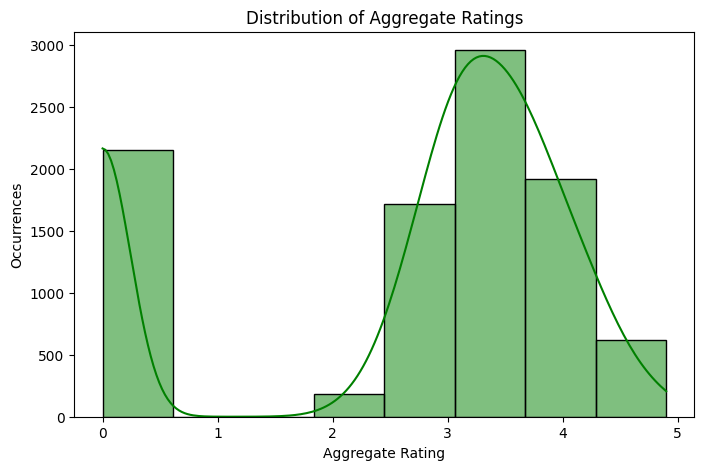

In [35]:
plt.figure(figsize=(8, 5))

sns.histplot(data['Aggregate rating'], bins=8, kde=True, color="green")

plt.xlabel("Aggregate Rating")
plt.ylabel("Occurrences")
plt.title("Distribution of Aggregate Ratings")
plt.show()

Calculate the average number of votes
received by restaurants.

In [36]:
agv_votes = float(data['Votes'].mean())
print(f"The average number of votes received by restaurants {agv_votes:.2f}")

The average number of votes received by restaurants 156.77


Task 2
                                    Task: Cuisine Combination

Identify the most common combinations of
cuisines in the dataset.

In [37]:
list(data['Cuisines'].value_counts().to_dict().items())

[('North Indian', 936),
 ('North Indian, Chinese', 511),
 ('Chinese', 354),
 ('Fast Food', 354),
 ('North Indian, Mughlai', 334),
 ('Cafe', 299),
 ('Bakery', 218),
 ('North Indian, Mughlai, Chinese', 197),
 ('Bakery, Desserts', 170),
 ('Street Food', 149),
 ('Pizza, Fast Food', 131),
 ('Chinese, Fast Food', 118),
 ('Mithai, Street Food', 116),
 ('South Indian', 112),
 ('Bakery, Fast Food', 108),
 ('Chinese, North Indian', 105),
 ('Mughlai', 103),
 ('Ice Cream, Desserts', 83),
 ('Ice Cream', 74),
 ('North Indian, Fast Food', 74),
 ('Mithai', 71),
 ('North Indian, Chinese, Mughlai', 70),
 ('North Indian, Chinese, Fast Food', 68),
 ('North Indian, Chinese, Continental', 65),
 ('Bakery, Desserts, Fast Food', 63),
 ('American, Fast Food, Salad, Healthy Food', 62),
 ('Mughlai, North Indian', 60),
 ('Fast Food, Burger', 56),
 ('Biryani', 54),
 ('Italian', 54),
 ('Beverages', 54),
 ('Pizza', 53),
 ('Desserts', 53),
 ('Chinese, Thai', 51),
 ('Raw Meats, North Indian, Fast Food', 49),
 ('Finger 

Determine if certain cuisine combinations
tend to have higher ratings.

In [38]:
data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

Cuisines
Burger, Bar Food, Steak                 4.9
American, Burger, Grill                 4.9
American, Caribbean, Seafood            4.9
American, Coffee and Tea                4.9
Mexican, American, Healthy Food         4.9
                                       ... 
Tibetan, South Indian, North Indian     0.0
Afghani, Mughlai, Chinese               0.0
Tibetan                                 0.0
Turkish, Arabian, Moroccan, Lebanese    0.0
Tibetan, Chinese, North Indian          0.0
Name: Aggregate rating, Length: 1825, dtype: float64

Task 3
Task: Geographic Analysis

Plot the locations of restaurants on a
map using longitude and latitude
coordinates.

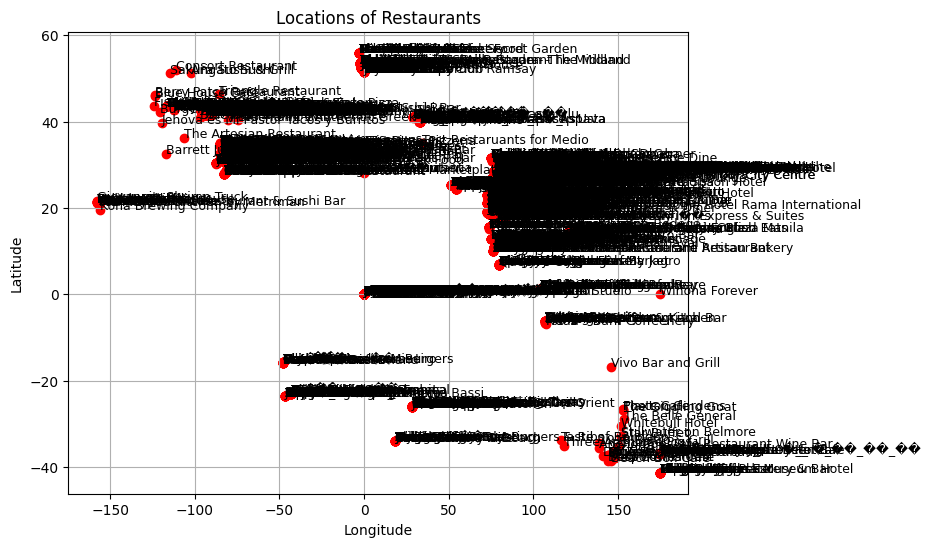

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(data['Longitude'], data['Latitude'], color = "red", marker='o')

for lon, lat, name in zip(data['Longitude'], data['Latitude'], data['Restaurant Name']):
    plt.text(lon, lat, name, fontsize=9)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Locations of Restaurants")
plt.grid()
plt.show()

Identify any patterns or clusters of
restaurants in specific areas.


Choose the number of clusters (K):

You decide how many clusters (K) you want to divide your data into.
Initialize K cluster centroids randomly:

The algorithm randomly picks K points as initial cluster centers (centroids).
Assign each data point to the nearest centroid:

For each point in the dataset, compute the Euclidean distance from each centroid.
Assign the point to the nearest centroid's cluster.
Recalculate centroids:

For each cluster, compute the mean of all points assigned to it.
Update the centroid to this new mean position.
Repeat Steps 3 & 4 until centroids do not change (or stop after set iterations):

This continues until centroids remain stable or a predefined max iterations is reached.
Final cluster assignments:

Once convergence is achieved, each data point is now part of a specific cluster.

In [40]:
from sklearn.cluster import KMeans
import numpy as np

In [41]:
coords = np.array(data[['Latitude', 'Longitude']])
coords

array([[ 14.565443  , 121.027535  ],
       [ 14.553708  , 121.014101  ],
       [ 14.581404  , 121.056831  ],
       ...,
       [ 41.05581715,  29.03464001],
       [ 41.057979  ,  29.036019  ],
       [ 40.98477563,  29.02601603]])

n_clusters=5	     Number of clusters	           More clusters → More refined grouping
random_state=42	     Fixes randomness	           Ensures the same result every run
n_init=10	         Runs K-Means multiple times   Picks the best clustering result

In [42]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)   # Apply K-Means clustering (let's assume 5 clusters)   #n_clusters=5 Number of Clusters
data['Cluster'] = kmeans.fit_predict(coords)                # random_state=42  Ensures Consistency, Without random_state, results will change each time the code runs.
data['Cluster']                                             #n_init=10  Runs K-Means Multiple Times

0       0
1       0
2       0
3       0
4       0
       ..
9546    4
9547    4
9548    4
9549    4
9550    4
Name: Cluster, Length: 9542, dtype: int32

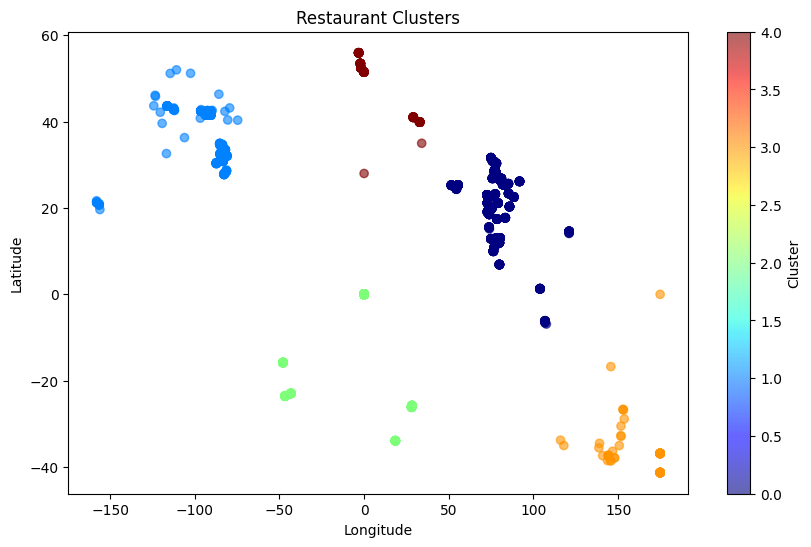

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='jet', alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Clusters")
plt.colorbar(label="Cluster")
plt.show()

In [44]:
print(plt.colormaps())  

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

Task 4
Task: Restaurant Chains

Identify if there are any restaurant chains
present in the dataset.

In [45]:
rest_count = data['Restaurant Name'].value_counts()
rest_count

Restaurant Name
Cafe Coffee Day      83
Domino's Pizza       79
Subway               63
Green Chick Chop     51
McDonald's           48
                     ..
�ukura��a Sofras۱     1
Gaga Manjero          1
Cafemiz               1
Nusr-Et               1
Maori                 1
Name: count, Length: 7437, dtype: int64

In [47]:
rest_count_chain = rest_count[rest_count > 1]
rest_count_chain

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
Mithaas Sweets       2
Brown Town           2
Bikaner's            2
Adarsh Kulfi         2
Tea Trails           2
Name: count, Length: 734, dtype: int64

Analyze the ratings and popularity of
different restaurant chains.

In [48]:
chains = rest_count_chain.index
chains

Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's', 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins',
       'Barbeque Nation',
       ...
       'Kake Da Dhaba', 'Coco Bambu', 'Kesarwa Bakez', 'Bake Walkers',
       'Mithaas', 'Mithaas Sweets', 'Brown Town', 'Bikaner's', 'Adarsh Kulfi',
       'Tea Trails'],
      dtype='object', name='Restaurant Name', length=734)

In [49]:
chain_data = data[data['Restaurant Name'].isin(chains)].head(3)
chain_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cluster
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,0
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,No,No,No,No,3,4.9,Dark Green,Excellent,1070,0
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,No,No,No,No,3,4.8,Dark Green,Excellent,294,0


In [50]:
rest_chain_rating = chain_data.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index()
rest_chain_rating

,Restaurant Name,Aggregate rating
0,Din Tai Fung,4.40
1,Silantro Fil-Mex,4.85


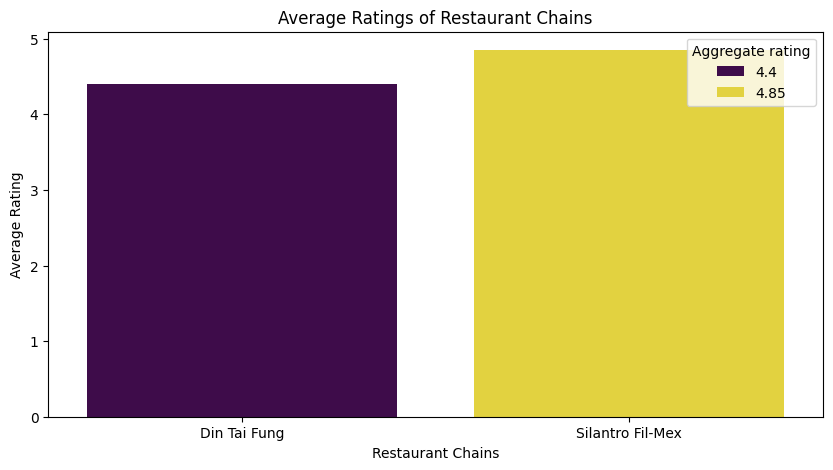

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Restaurant Name',y='Aggregate rating', hue='Aggregate rating', data=rest_chain_rating, palette='viridis')
plt.title("Average Ratings of Restaurant Chains")
plt.xlabel("Restaurant Chains")
plt.ylabel("Average Rating")
plt.show()

Level 3

Task 1
Task: Restaurant Reviews

Analyze the text reviews to identify the most
common positive and negative keywords.

In [52]:
rating_count_txt =list(data['Rating text'].value_counts().items())
rating_count_txt

[('Average', 3734),
 ('Not rated', 2148),
 ('Good', 2096),
 ('Very Good', 1078),
 ('Excellent', 300),
 ('Poor', 186)]

In [53]:
print(f"The most common positive word is \"{rating_count_txt[0][0]}\" and count {rating_count_txt[0][1]}")
print(f"The most common negative word is \"{rating_count_txt[-1][0]}\" and count {rating_count_txt[-1][1]}")

The most common positive word is "Average" and count 3734
The most common negative word is "Poor" and count 186


Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

Task 2
Task: Votes Analysis

Identify the restaurants with the highest and
lowest number of votes.

In [54]:
votes_ident = data.groupby('Restaurant Name')['Votes'].max().reset_index()
votes_ident

,Restaurant Name,Votes
0,#45,209
1,#Dilliwaala6,124
2,#InstaFreeze,2
3,#OFF Campus,216
4,#Urban Caf��,49
...,...,...
7432,t Lounge by Dilmah,34
7433,tashas,374
7434,wagamama,131
7435,{Niche} - Cafe & Bar,492


In [55]:
highest_voted = votes_ident.sort_values(by='Votes', ascending=False).head(1)   #(highest_voted.to_string(index=False, header=False))[5:]
lowest_voted = votes_ident.sort_values(by='Votes', ascending=True).head(1)

In [56]:
print(f"The restaurants \"{(highest_voted.to_string(index=False, header=False))[0:4]}\" with the highest {(highest_voted.to_string(index=False, header=False))[5:]} number of votes.")
print(f"The restaurants \"{(lowest_voted.to_string(index=False, header=False))[3:9]}\" with the lowest {(lowest_voted.to_string(index=False, header=False))[-1]} number of votes.")

The restaurants "Toit" with the highest 10934 number of votes.
The restaurants "Grills" with the lowest 0 number of votes.


Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [57]:
correlation = data[['Votes', 'Aggregate rating']].corr(method='pearson')
print(correlation)

                     Votes  Aggregate rating
Votes             1.000000          0.313474
Aggregate rating  0.313474          1.000000


<Axes: >

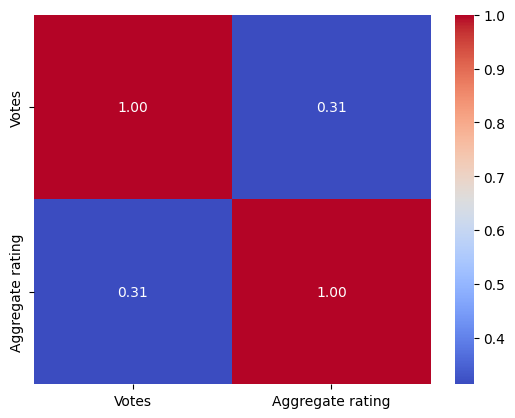

In [86]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

Task 3
Task: Price Range vs. Online Delivery and
Table Booking

Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.

In [114]:
delivery_booking = data.groupby('Price range')[['Has Online delivery', 'Has Table booking']].apply(lambda x:(x == 'Yes').mean() * 100).reset_index()
delivery_booking

,Price range,Has Online delivery,Has Table booking
0,1,15.795403,0.022533
1,2,41.310633,7.677482
2,3,29.252669,45.836299
3,4,9.044369,46.757679


In [115]:
# delivery_booking = data.groupby('Price range').agg({'Has Online delivery': lambda x :(x == 'Yes').mean() * 100 ,'Has Table booking': lambda x:(x == 'Yes').mean() * 100}).reset_index()
# delivery_booking

<Axes: xlabel='None', ylabel='Has Online delivery'>

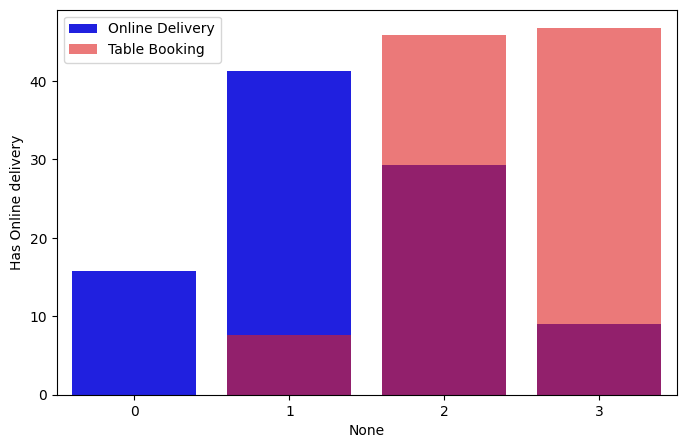

In [116]:
plt.figure(figsize=(8, 5))                                                                       
sns.barplot(x=delivery_booking.index, y=delivery_booking['Has Online delivery'], color='blue', label='Online Delivery')      # Plot Online Delivery availability
sns.barplot(x=delivery_booking.index, y=delivery_booking['Has Table booking'], color='red', alpha=0.6, label='Table Booking') # Plot Table Booking availability

Determine if higher-priced restaurants are
more likely to offer these services.

In [ ]:
# services = data.groupby('Price range')[['Has Online delivery', 'Has Table booking']].apply(lambda x:(x == 'Yes').mean() * 100).reset_index()
# services

,Price range,Has Online delivery,Has Table booking
0,1,15.795403,0.022533
1,2,41.310633,7.677482
2,3,29.252669,45.836299
3,4,9.044369,46.757679


<Axes: xlabel='Price range', ylabel='Has Online delivery'>

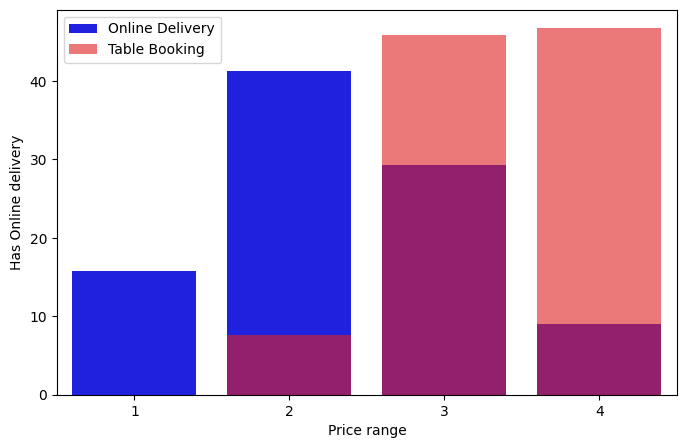

In [ ]:
# plt.figure(figsize=(8, 5))                                                                       
# sns.barplot(data=services, x='Price range', y='Has Online delivery', color='blue', label='Online Delivery')      
# sns.barplot(data=services,x='Price range', y='Has Table booking', color='red', alpha=0.6, label='Table Booking') 